# Avocados

# Importing Libraries and Reading the Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
import optuna





#Reading the Dataset
#Read the dataset into a Pandas DataFrame!

df = pd.read_csv('avocado.csv')

df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Description of the data

In [2]:

df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# Checking for Missing Values

In [4]:
#Does the dataset include any missing values? If so, drop them!
print("missing values")
print(df.isna().sum())


#no missing values


df.head()

missing values
Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Extract Features

In [5]:

#Exclude the region and date from the considered features.


df_processed = df.drop(columns=['Date','region','Unnamed: 0'])
df_processed.head()




,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015


# Perform Preprocessing

In [8]:

#Perform any needed pre-processing on the chosen features including:

#Encoding.

df_processed['type']=LabelEncoder().fit_transform(df_processed['type'].values)

#Scaling.


df_processed[['Total Volume'
              ,'4046','4225','4770','Total Bags',
              'Small Bags','Large Bags','XLarge Bags',
              'year']]=StandardScaler().fit_transform(df_processed[['Total Volume','4046'
                                                                    ,'4225','4770','Total Bags',
                                                                    'Small Bags','Large Bags','XLarge Bags','year']])


df_processed.head()




,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,0,-1.221282
1,1.35,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,0,-1.221282
2,0.93,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,0,-1.221282
3,1.08,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,0,-1.221282
4,1.28,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,0,-1.221282


C:\Users\satin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


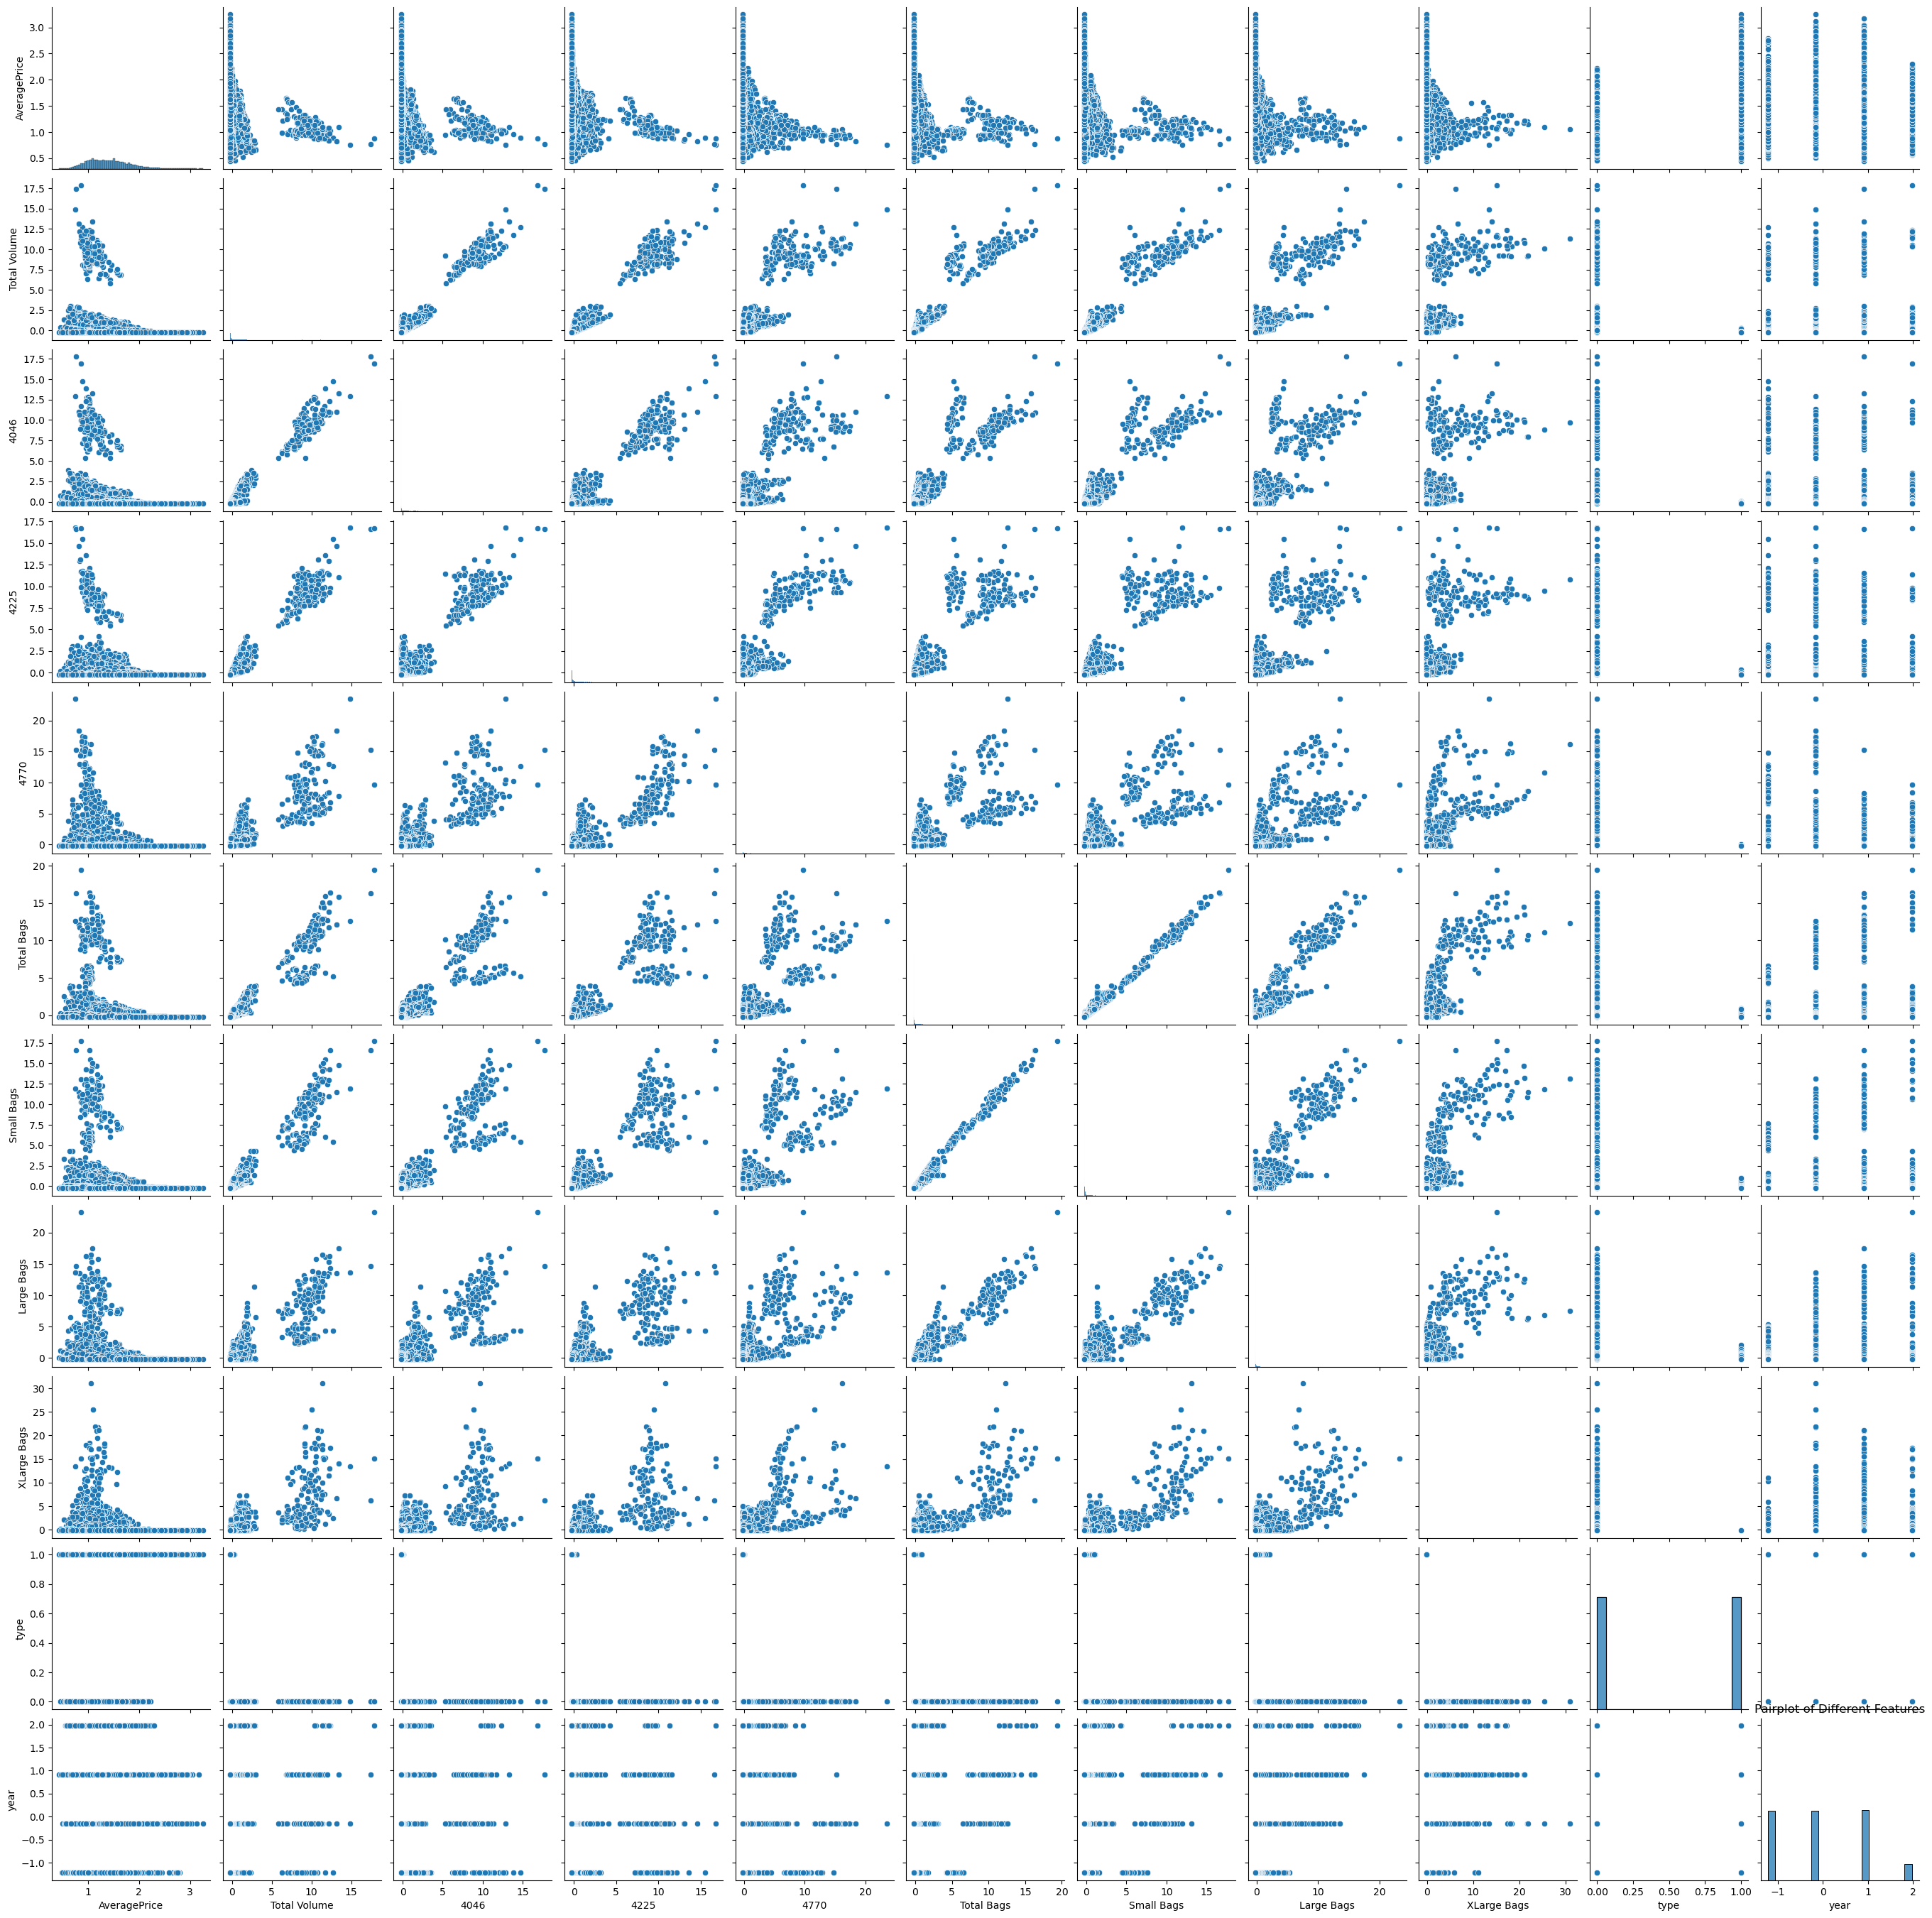

In [9]:
# Pairplot to visualize pairwise relationships
sns.pairplot(df_processed)
plt.title('Pairplot of Different Features')
plt.show()



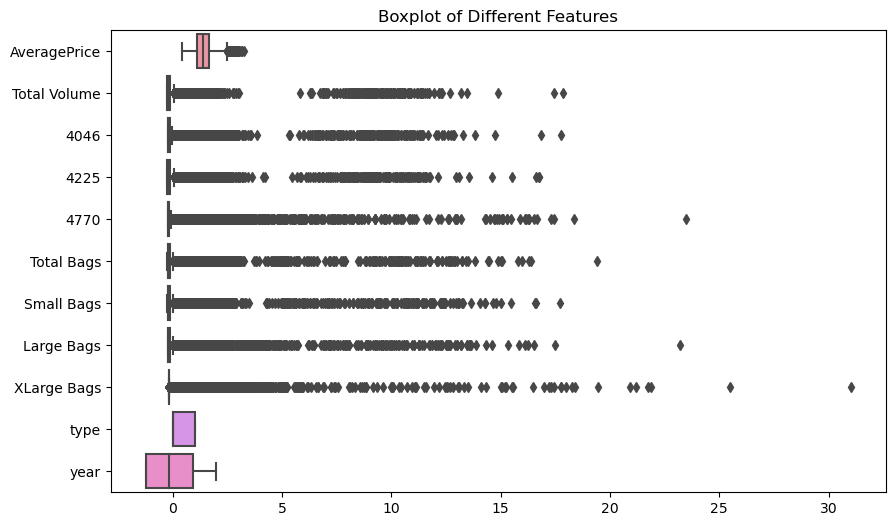

In [10]:

# Boxplot for visualizing distribution by feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_processed, orient='h')
plt.title('Boxplot of Different Features')
plt.show()


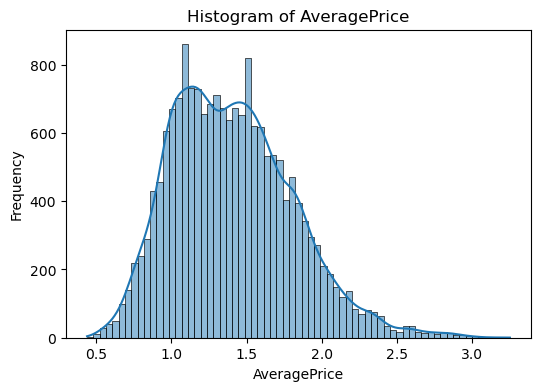

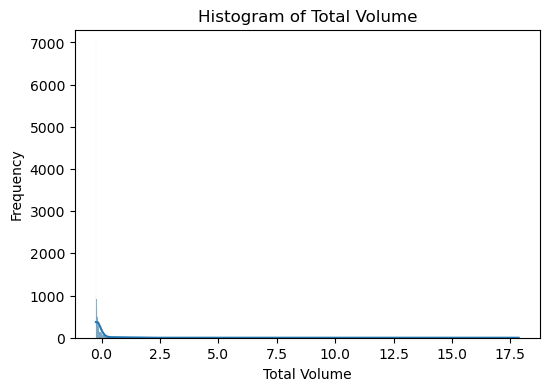

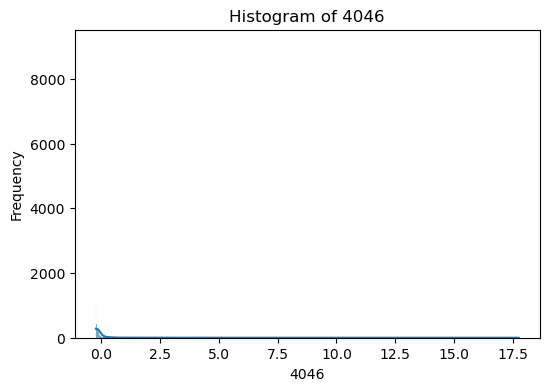

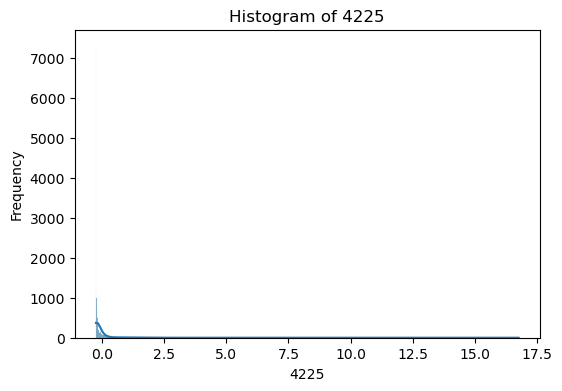

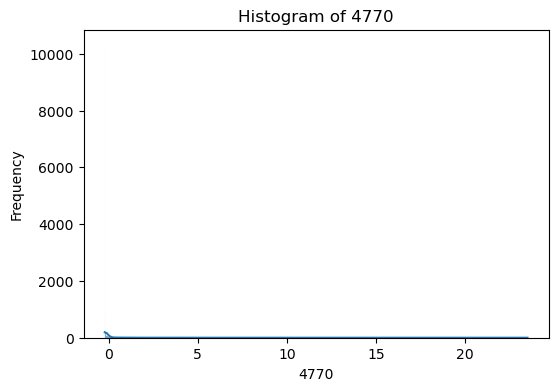

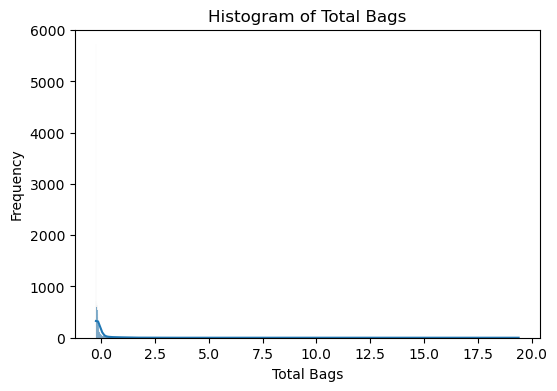

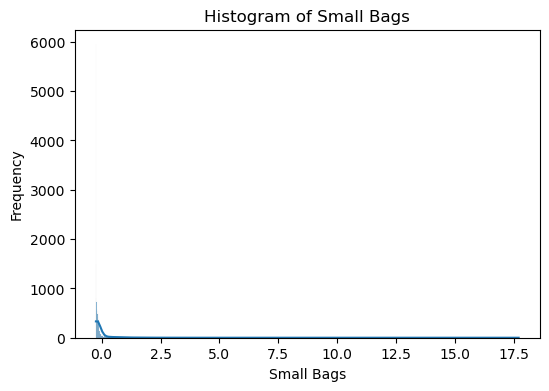

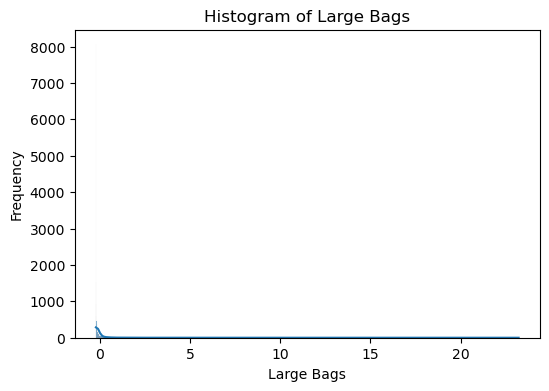

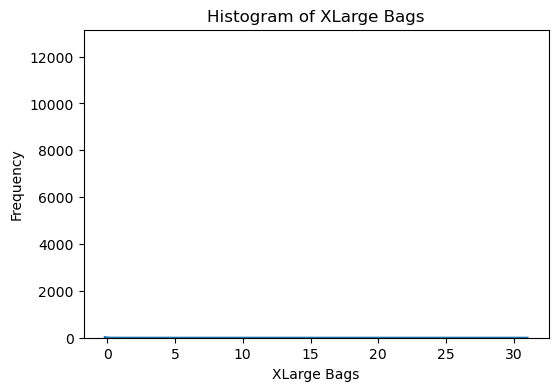

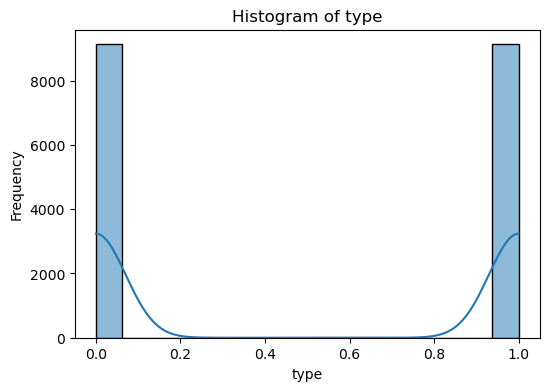

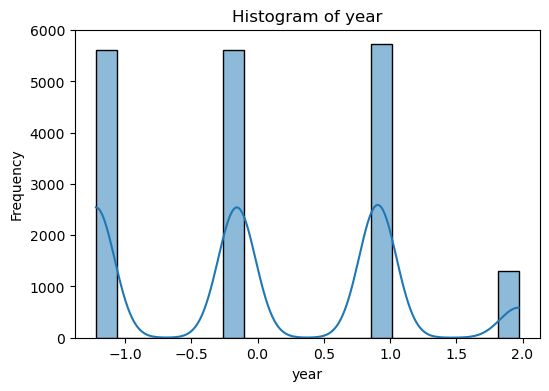

In [11]:
# Histograms for individual features
for column in df_processed.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_processed[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


# Feature Selection

[1.0, -0.19275238715271903, -0.2083170484878848, -0.1729277725093353, -0.17944598397975636, -0.17708792839046755, -0.17472978377396528, -0.17294000978530416, -0.11759162287452984, 0.6158448927658438, 0.09319698370758475]


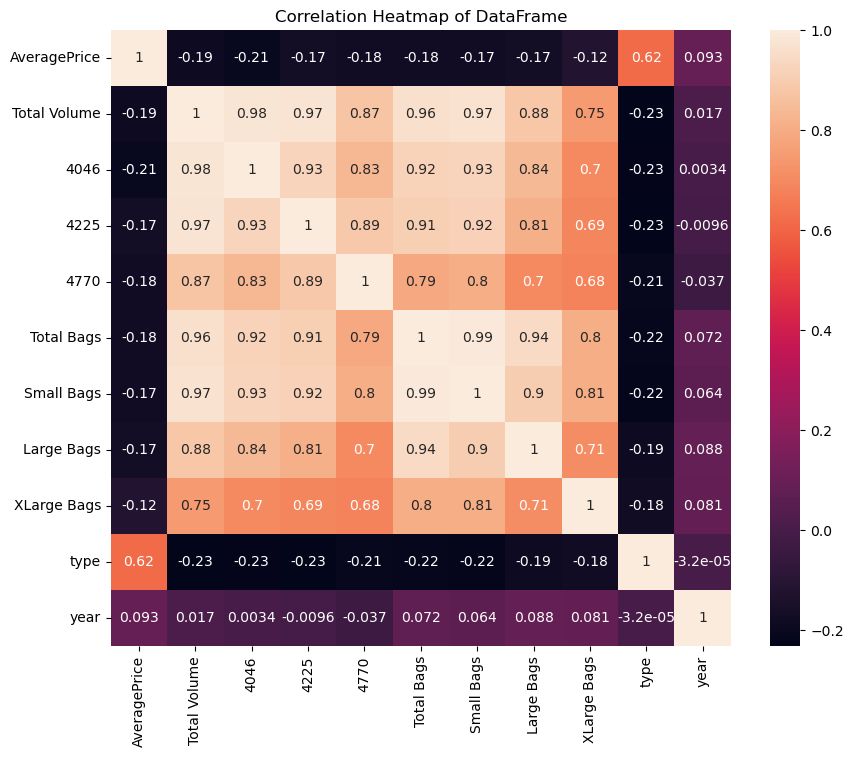

In [12]:

#Choose the features you think are relevant to our analysis! 


correlation = df_processed.corrwith(df_processed["AveragePrice"])

print(list(correlation))


# Calculate the correlation matrix
correlation_matrix = df_processed.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,)
plt.title('Correlation Heatmap of DataFrame')
plt.show()

In [13]:


columns_to_be_dropped = []

for i in range(len(correlation)):
    if ((abs(correlation[i])) < 0.15):
        columns_to_be_dropped.append(df_processed.columns[i])

df_processed = df_processed.drop(columns_to_be_dropped,axis = 1)


df_processed.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type
0,1.33,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,0
1,1.35,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,0
2,0.93,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,0
3,1.08,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,0
4,1.28,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,0


# Splitting the Data

In [14]:

#Split your data as follows:
#80% training set.
#10% validation set.
#10% test set.

y = df_processed["AveragePrice"].values
X = df_processed[df_processed.columns.difference(['AveragePrice'])]

X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=0)

X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=1)







# KNN Regression

In [15]:

#Use a KNN Regressor model to train your data.
#Choose the best k for the KNN algorithm by trying different values and validating performance on the validation set.
#Regression Metrics
#Print the R-squared score of your final KNN regressor.

def objective (trial):
    params = {
        'n_neighbors' : trial.suggest_int('n_neighbors',1,50),
        'weights' : trial.suggest_categorical('weights',['uniform', 'distance']),
        'p' : trial.suggest_int('p',1, 2)    
    }
    
    model_temp1 = KNeighborsRegressor(**params).fit(X_train, y_train)
    score = model_temp1.score(X_test,y_test)
    return score


study = optuna.create_study(direction = "maximize")

study.optimize(objective, n_trials=100)

print('Best parameters are: ', study.best_params)
print('R-square :',study.best_value)


[I 2024-01-07 15:59:05,413] A new study created in memory with name: no-name-9e445b29-dd66-4bc4-841f-d10033333b36
[I 2024-01-07 15:59:05,585] Trial 0 finished with value: 0.6585204324357754 and parameters: {'n_neighbors': 29, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.6585204324357754.
[I 2024-01-07 15:59:05,719] Trial 1 finished with value: 0.6377830973575891 and parameters: {'n_neighbors': 21, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.6585204324357754.
[I 2024-01-07 15:59:05,886] Trial 2 finished with value: 0.6450761152670079 and parameters: {'n_neighbors': 49, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.6585204324357754.
[I 2024-01-07 15:59:05,987] Trial 3 finished with value: 0.6883607712859352 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'p': 1}. Best is trial 3 with value: 0.6883607712859352.
[I 2024-01-07 15:59:06,132] Trial 4 finished with value: 0.6144995026170001 and parameters: {'n_neighbors': 39, 'weights

[I 2024-01-07 15:59:12,210] Trial 42 finished with value: 0.7031804667009698 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'p': 1}. Best is trial 23 with value: 0.7031804667009698.
[I 2024-01-07 15:59:12,357] Trial 43 finished with value: 0.6695394164575679 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'p': 1}. Best is trial 23 with value: 0.7031804667009698.
[I 2024-01-07 15:59:12,505] Trial 44 finished with value: 0.7031804667009698 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'p': 1}. Best is trial 23 with value: 0.7031804667009698.
[I 2024-01-07 15:59:12,641] Trial 45 finished with value: 0.6695394164575679 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'p': 1}. Best is trial 23 with value: 0.7031804667009698.
[I 2024-01-07 15:59:12,807] Trial 46 finished with value: 0.668637334802419 and parameters: {'n_neighbors': 11, 'weights': 'uniform', 'p': 1}. Best is trial 23 with value: 0.7031804667009698.
[I 2024-01-07 15:59:12,958] Trial 47

[I 2024-01-07 15:59:19,350] Trial 85 finished with value: 0.6904817434421762 and parameters: {'n_neighbors': 11, 'weights': 'distance', 'p': 1}. Best is trial 23 with value: 0.7031804667009698.
[I 2024-01-07 15:59:19,511] Trial 86 finished with value: 0.6792294281431812 and parameters: {'n_neighbors': 4, 'weights': 'uniform', 'p': 1}. Best is trial 23 with value: 0.7031804667009698.
[I 2024-01-07 15:59:19,680] Trial 87 finished with value: 0.7031804667009698 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'p': 1}. Best is trial 23 with value: 0.7031804667009698.
[I 2024-01-07 15:59:19,866] Trial 88 finished with value: 0.6847363098368153 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'p': 2}. Best is trial 23 with value: 0.7031804667009698.
[I 2024-01-07 15:59:20,066] Trial 89 finished with value: 0.68706947546967 and parameters: {'n_neighbors': 14, 'weights': 'distance', 'p': 1}. Best is trial 23 with value: 0.7031804667009698.
[I 2024-01-07 15:59:20,187] Trial 90

Best parameters are:  {'n_neighbors': 6, 'weights': 'distance', 'p': 1}
R-square : 0.7031804667009698


# LINEAR REGRESSION

In [16]:

from sklearn.linear_model import LinearRegression

model_lr = LinearRegression().fit(X_train, y_train)


# Evaluate the model
score = model_lr.score(X_test, y_test)
print("R-squared score:", score)

R-squared score: 0.39189510992157706


# SVR

In [ ]:

from sklearn.svm import SVR


def objective (trial):
    params = {
        'kernel' : trial.suggest_categorical('kernel',['linear', 'poly', 'rbf', 'sigmoid']),
        'C' : trial.suggest_int('C',1, 10)    
    }
    
    model_temp_svr = SVR(**params).fit(X_train, y_train)
    score = model_temp_svr.score(X_test,y_test)
    return score


study_svr = optuna.create_study(direction = "maximize")

study_svr.optimize(objective, n_trials=10)

print('Best parameters are: ', study_svr.best_params)
print('R-square :',study_svr.best_value)


[I 2024-01-05 15:46:11,269] A new study created in memory with name: no-name-b68d76f1-5104-456c-b106-792a7dd5f728
[I 2024-01-05 15:46:44,704] Trial 0 finished with value: 0.47154060858429914 and parameters: {'kernel': 'rbf', 'C': 9}. Best is trial 0 with value: 0.47154060858429914.
[I 2024-01-05 15:47:26,448] Trial 1 finished with value: -22451942.88596632 and parameters: {'kernel': 'sigmoid', 'C': 9}. Best is trial 0 with value: 0.47154060858429914.
[I 2024-01-05 15:48:28,041] Trial 2 finished with value: 0.38690841221585326 and parameters: {'kernel': 'linear', 'C': 5}. Best is trial 0 with value: 0.47154060858429914.
[I 2024-01-05 15:49:33,239] Trial 3 finished with value: 0.3869333179963561 and parameters: {'kernel': 'linear', 'C': 7}. Best is trial 0 with value: 0.47154060858429914.
[I 2024-01-05 15:50:07,486] Trial 4 finished with value: -275791.13519151096 and parameters: {'kernel': 'sigmoid', 'C': 1}. Best is trial 0 with value: 0.47154060858429914.
[I 2024-01-05 15:50:45,031] T

# RANDOM FOREST

In [18]:
from sklearn.ensemble import RandomForestRegressor


def objective_rf (trial):
    params = {
        'n_estimators' : trial.suggest_int('n_estimators',100,500,step = 100),
        #'criterion' : trial.suggest_categorical('criterion',['squared_error', 'absolute_error', 'friedman_mse']),
        #'max_depth' : trial.suggest_int('max_depth',1, 10)    
    }
    
    model_temp_rf = RandomForestRegressor(**params).fit(X_train, y_train)
    return model_temp_rf.score(X_test,y_test)
   

study_rf = optuna.create_study(direction = "maximize")

study_rf.optimize(objective_rf, n_trials=10)

print('Best parameters are: ', study_rf.best_params)
print('R-square :',study_rf.best_value)



[I 2024-01-07 16:00:30,259] A new study created in memory with name: no-name-2b93bcdf-0492-4712-bb79-f49209aa6141
[I 2024-01-07 16:03:17,068] Trial 0 finished with value: 0.7628736411686989 and parameters: {'n_estimators': 500}. Best is trial 0 with value: 0.7628736411686989.
[I 2024-01-07 16:05:23,498] Trial 1 finished with value: 0.7634933261409954 and parameters: {'n_estimators': 400}. Best is trial 1 with value: 0.7634933261409954.
[I 2024-01-07 16:07:34,380] Trial 2 finished with value: 0.7632947329301918 and parameters: {'n_estimators': 400}. Best is trial 1 with value: 0.7634933261409954.
[I 2024-01-07 16:10:31,771] Trial 3 finished with value: 0.7624981991858962 and parameters: {'n_estimators': 500}. Best is trial 1 with value: 0.7634933261409954.
[I 2024-01-07 16:12:33,881] Trial 4 finished with value: 0.7618379434818622 and parameters: {'n_estimators': 300}. Best is trial 1 with value: 0.7634933261409954.
[I 2024-01-07 16:13:10,524] Trial 5 finished with value: 0.759648674918

Best parameters are:  {'n_estimators': 500}
R-square : 0.7642626156337918


# XGBRegressor

In [12]:
def objective_xgb(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.5),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000)
    }

   
    model_xgb = XGBRegressor(**params)
    model_xgb.fit(X_train, y_train)
    return model_xgb.score(X_test,y_test)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=10)


print('Best parameters are: ', study_xgb.best_params)
print('R-square :',study_xgb.best_value)

[I 2024-01-05 16:30:46,767] A new study created in memory with name: no-name-15fd10c2-dade-4d4a-9bbd-f442139f1707
C:\Users\satin\AppData\Local\Temp\ipykernel_7132\3216319733.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.5),
[I 2024-01-05 16:30:47,777] Trial 0 finished with value: 0.6788626260753021 and parameters: {'max_depth': 3, 'learning_rate': 0.07523752686882886, 'n_estimators': 751}. Best is trial 0 with value: 0.6788626260753021.
C:\Users\satin\AppData\Local\Temp\ipykernel_7132\3216319733.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning

Best parameters are:  {'max_depth': 9, 'learning_rate': 0.06561715033909342, 'n_estimators': 402}
R-square : 0.7593045991295364
